In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LOAD DATA

In [39]:
X_train= pd.read_csv("../datasets/Logistic_X_Train.csv")
Y_train = pd.read_csv("../datasets/Logistic_Y_Train.csv")

In [40]:
X_train.head(n=5)

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [41]:
Y_train.head(n=5)

,label
0,1
1,1
2,1
3,0
4,0


# CONVERT DATAFRAME TO NUMPY ARRAY



In [42]:
X_train = X_train.values
Y_train = Y_train.values
print(type(X_train),type(Y_train))
print(X_train.shape,Y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(3000, 3) (3000, 1)


# VISUALIZE

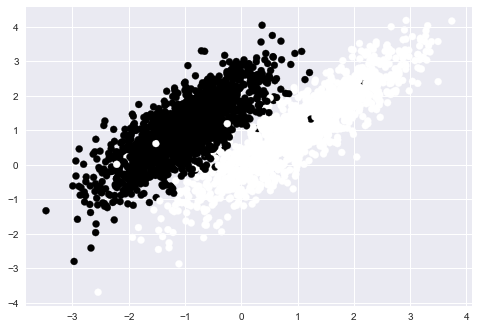

In [43]:
#c takes a sequence means one row so reshape
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape(-1,))
plt.show()


# NORMALISE

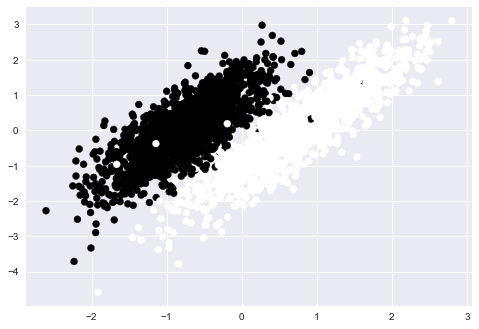

In [47]:
u = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)
X_train = (X_train-u)/std

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape(-1,))
plt.show()

# LOAD TEST DATA AND ALSO NORMALIZE IT

In [48]:
X_test = pd.read_csv("../datasets/Logistic_X_Test.csv")
X_test = X_test.values

In [50]:
X_test = (X_test-u)/std

# IMPLEMENTATION

In [66]:
def sigmoid(value):
    return 1.0/(1.0+np.exp(-value))
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))
def error(X,y,theta):
    y = y.reshape(-1,1)
    hi = hypothesis(X,theta)
    e = -1*np.sum((y*np.log(hi))+((1-y)*np.log(1-hi)))
    return e/X.shape[0]
def gradient(X,y,theta):
    y = y.reshape(-1,1)
    hi = hypothesis(X,theta)
    grad = np.dot(X.T,(y-hi))
    return grad/X.shape[0]
def gradient_descent(X,y,lr=0.5,epochs=150):
    y = y.reshape(-1,1)
    theta=np.zeros((X.shape[1],1))
    error_list = []
    for i in range(epochs):
        e = error(X,y,theta)
        error_list.append(e)
        theta = theta + lr*gradient(X,y,theta)
    return error_list,theta

# Add X0 in training and test data

In [68]:
ones = np.ones((X_train.shape[0],1))
X_new_train = np.hstack((ones,X_train))
ones = np.ones((X_test.shape[0],1))
X_new_test = np.hstack((ones,X_test))
print(X_new_train[:5,:])
print(X_new_test[:5,:])

[[ 1.         -0.93471307 -0.24439694 -0.46140414]
 [ 1.         -0.7823013  -0.19327286 -1.08586573]
 [ 1.         -0.46707053  0.56681072 -1.17534766]
 [ 1.          0.99595846  0.34128188  1.16101187]
 [ 1.          0.48839071  0.29377517  0.44826784]]
[[ 1.         -0.76750773 -0.2618595  -2.51483147]
 [ 1.         -1.24165258  1.44900144 -0.4130893 ]
 [ 1.          1.92527007  1.93176097  1.34261917]
 [ 1.         -1.29825474  1.04976112 -0.52731909]
 [ 1.         -0.96471175  0.93808838 -1.18632767]]


# Getting Theta  

In [69]:
error_list,theta = gradient_descent(X_new_train,Y_train)

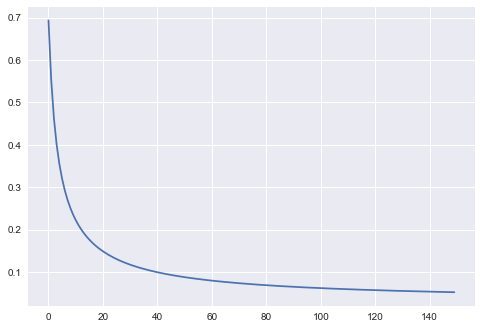

In [70]:
plt.plot(error_list)

In [71]:
theta


array([[-0.45077118],
       [-2.90533553],
       [ 1.65423216],
       [-2.49240435]])

# PREDICTIONS

In [72]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros((h.shape))
    output[h>=0.5] = 1
    ouptut = output.astype('int')
    return output

XT_preds=predict(X_new_train,theta)
Xt_preds = predict(X_new_test,theta)
print(XT_preds.shape,Xt_preds.shape)

(3000, 1) (1000, 1)


# ACCURACY

In [73]:
def accuracy(actual,pred):
    #convert actual values to int
    actual = actual.astype("int")
    #check both have equal shape
    actual = actual.reshape((-1,1))
    return(np.sum(actual==pred)/actual.shape[0])*100

In [75]:
print(accuracy(Y_train,XT_preds))

99.36666666666667


# SAVING INTO CSV

In [93]:
output = pd.DataFrame(Xt_preds)

In [94]:
output = output.astype('int')

In [96]:
output.to_csv("results.csv",index=None)

# SK

In [97]:
from sklearn.linear_model import LogisticRegression

In [99]:
model = LogisticRegression()

In [106]:
model.fit(X_train,Y_train.reshape(-1,))
output_sk=model.predict(X_test)

In [109]:
output_csv_sk = pd.DataFrame(output_sk)

In [110]:
output_csv_sk.to_csv("results_cv.csv",index=None)

# COMPARING SKLEARN AND MINE

In [115]:
type(output_sk)

numpy.ndarray

In [114]:
type(Xt_preds)

numpy.ndarray

In [116]:
count = 0
for i in range(1000):
    if(output_sk[i]==Xt_preds[i]):
        count+=1

In [117]:
print(count)

995
